#IMPORT LIBS


In [65]:
import os 
import tensorflow.keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import VGG19

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report


#PREPARE DATA

In [66]:
base_dir = './data/planes'
classes = ['passenger-plane', 'drone', 'helicopter', 'fighter-jet', 'missile', 'rocket']

raw_len_files = {}

for dir_ in classes:
    raw_len_files[dir_] = len(os.listdir(os.path.join(base_dir, dir_)))
raw_len_files

{'passenger-plane': 1360,
 'drone': 1293,
 'helicopter': 1379,
 'fighter-jet': 1867,
 'missile': 1334,
 'rocket': 1186}

In [67]:
data_dir = "image"
# create dir for copy photos
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
valid_dir = os.path.join(data_dir, "validation")

train_drone_dir = os.path.join(train_dir, 'drone')
test_drone_dir = os.path.join(test_dir, 'drone')
valid_drone_dir = os.path.join(valid_dir, 'drone')

train_plane_dir = os.path.join(train_dir, 'passenger')
test_plane_dir = os.path.join(test_dir, 'passenger')
valid_plane_dir = os.path.join(valid_dir, 'passenger')

train_helicopter_dir = os.path.join(train_dir, 'helicopter')
test_helicopter_dir = os.path.join(test_dir, 'helicopter')
valid_helicopter_dir = os.path.join(valid_dir, 'helicopter')
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

dirs = [ train_dir, test_dir, valid_dir]
for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
dirs = [train_drone_dir, train_plane_dir, train_helicopter_dir, 
        test_drone_dir, test_plane_dir, test_helicopter_dir,
        valid_drone_dir, valid_plane_dir, valid_helicopter_dir]
for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)

In [68]:
drone_fnames = os.listdir(os.path.join(base_dir, 'drone'))
plane_fnames = os.listdir(os.path.join(base_dir, 'passenger-plane'))
helicopter_fnames = os.listdir(os.path.join(base_dir, 'helicopter'))

drone_fnames = [name for name in drone_fnames if name.split('.')[1].lower() in ('jpg', 'png', 'jpeg')] 
plane_fnames = [name for name in plane_fnames if name.split('.')[1].lower() in ('jpg', 'png', 'jpeg')]
helicopter_fnames = [name for name in helicopter_fnames if name.split('.')[1].lower() in ('jpg', 'png', 'jpeg')]


In [69]:
size = min(len(drone_fnames), len(plane_fnames), len(helicopter_fnames))

train_size = int(np.floor(0.7 * size))
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

train_idx = train_size
valid_idx = train_size + valid_size
test_idx = train_size + valid_size + test_size



#COPY DATA TO TRAIN, VALID, AND TEST FOLDERS

In [70]:
base_drone_dir = os.path.join(base_dir, 'drone')
base_plane_dir = os.path.join(base_dir, 'passenger-plane')
base_helicopter_dir = os.path.join(base_dir, 'helicopter')

for idx, name in enumerate(drone_fnames):
    src = os.path.join(base_drone_dir, name)
    
    if idx < train_idx:
        dst = os.path.join(train_drone_dir, name)
        
    elif idx < valid_idx:
        dst = os.path.join(valid_drone_dir, name)
        
    elif idx < test_idx:
        dst = os.path.join(test_drone_dir, name)
        
    shutil.copy(src, dst)

for idx, name in enumerate(plane_fnames):
    src = os.path.join(base_plane_dir, name)
    
    if idx < train_idx:
        dst = os.path.join(train_plane_dir, name)
        
    elif idx < valid_idx:
        dst = os.path.join(valid_plane_dir, name)
        
    elif idx < test_idx:
        dst = os.path.join(test_plane_dir, name)
        
    shutil.copy(src, dst)


for idx, name in enumerate(helicopter_fnames):
    src = os.path.join(base_helicopter_dir, name)
    
    if idx < train_idx:
        dst = os.path.join(train_helicopter_dir, name)
        
    elif idx < valid_idx:
        dst = os.path.join(valid_helicopter_dir, name)
        
    elif idx < test_idx:
        dst = os.path.join(test_helicopter_dir, name)
        
    shutil.copy(src, dst)
    

PRINT FOLDER SIZES

In [71]:
print(f" train drone size:{len(os.listdir(train_drone_dir))}\n",
    f"valid drone size:{len(os.listdir(valid_drone_dir))}\n",
    f"test drone size{len(os.listdir(test_drone_dir))}\n")

print(f" train plane size:{len(os.listdir(train_plane_dir))}\n",
    f"valid plane size:{len(os.listdir(valid_plane_dir))}\n",
    f"test plane size{len(os.listdir(test_plane_dir))}\n")

print(f" train helicopter size:{len(os.listdir(train_helicopter_dir))}\n",
    f"valid helicopter size:{len(os.listdir(valid_helicopter_dir))}\n",
    f"test helicopter size{len(os.listdir(test_helicopter_dir))}\n")

 train drone size:891
 valid drone size:254
 test drone size128

 train plane size:891
 valid plane size:254
 test plane size128

 train helicopter size:891
 valid helicopter size:254
 test helicopter size128



#SHOW RANDOM IMAGE

In [6]:
def show_image(directory, idx):
    """Show image from  directory
    directory: string -> path to the folder with images
    idx: int -> index of image"""
    image_list = os.listdir(directory)
    image_path = os.path.join(directory, image_list[idx])
    img = image.load_img(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.grid(False)
    plt.axis(False)

def show_random_image(directory):
    """Show random image from directory
    directory: strin -> path to the directory"""
    image_dir_size = len(os.listdir(directory))
    idx_random = np.random.randint(image_dir_size)
    show_image(directory, idx_random)

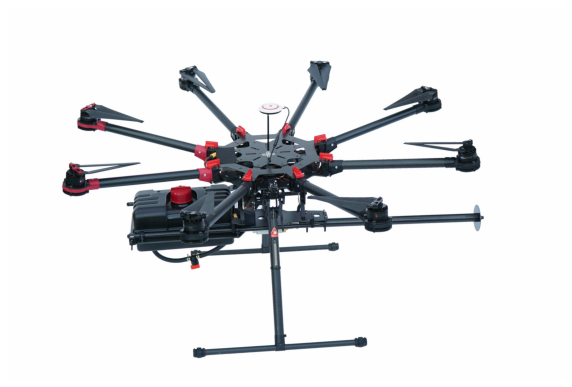

In [7]:
show_random_image(train_drone_dir)

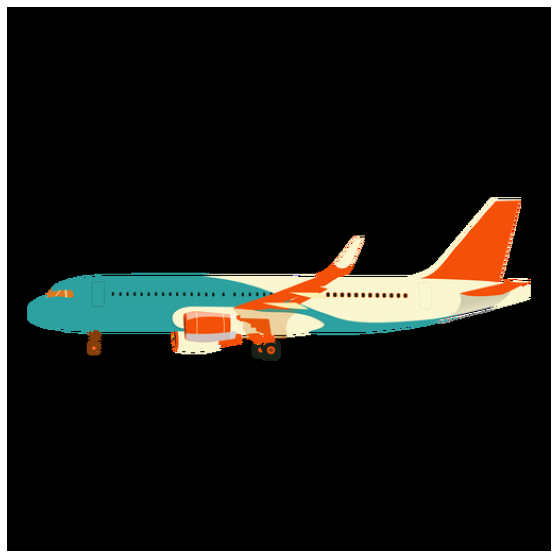

In [8]:
show_random_image(train_plane_dir)

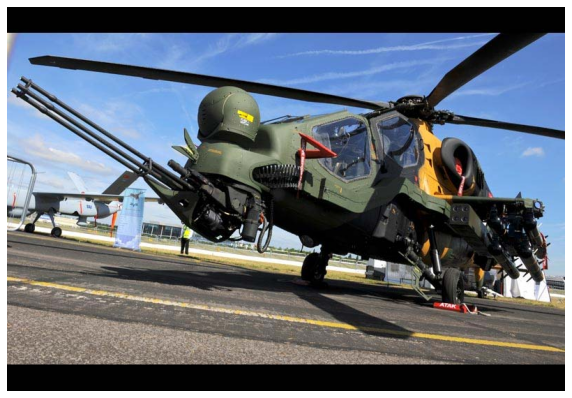

In [29]:
show_random_image(train_helicopter_dir)

#DATA AUGMENTATION

In [72]:
train_datagen = ImageDataGenerator(
        rotation_range=40,      #random angle rotation
        rescale=1./255.,
        width_shift_range=0.2,   #werical transformation 
        height_shift_range=0.2,   #horizontal transformation
        shear_range=0.2,         #random cliping range
        zoom_range=0.2,          #random zoom range
        horizontal_flip=True,     # ranom horizontal mirror 
        fill_mode='nearest'      #a strategy for filling new created pixels
)
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(directory=valid_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

                                                    
                                                    

Found 2673 images belonging to 3 classes.
Found 762 images belonging to 3 classes.


#Show augmented images


In [73]:
def show_augmented_image(directory, idx):
    """show board of some augmented images
    directory: string -> path to the folder
    idx: int -> index of image"""
    
    image_list = os.listdir(directory)
    image_path = os.path.join(directory, image_list[idx])

    img = image.load_img(path=image_path,target_size=(150, 150))

    #prepare image for ImageDataGenerator
    x = image.img_to_array(img)
    x = x.reshape((1,) +x.shape)

    i = 1
    plt.figure(figsize=(16, 8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        plt.axis(False)
        plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i%13 == 0:
            break

def show_random_augmented_image(directory):
    """show board of some random augmented image
    directory: string -> path to the foleder"""

    len_of_image_folder =  len(os.listdir(directory))
    random_idx = np.random.randint(len_of_image_folder)
    show_augmented_image(directory, random_idx)

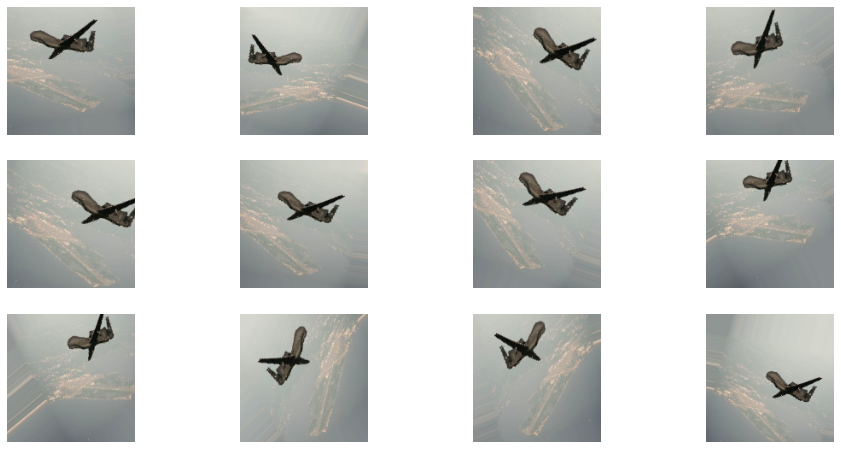

In [79]:
#show dron photo
show_random_augmented_image(train_drone_dir)

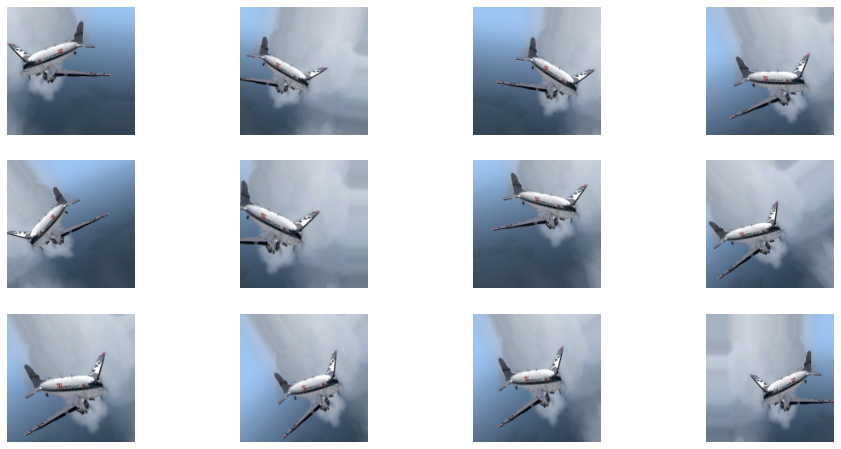

In [80]:
#show plane photos
show_random_augmented_image(train_plane_dir)

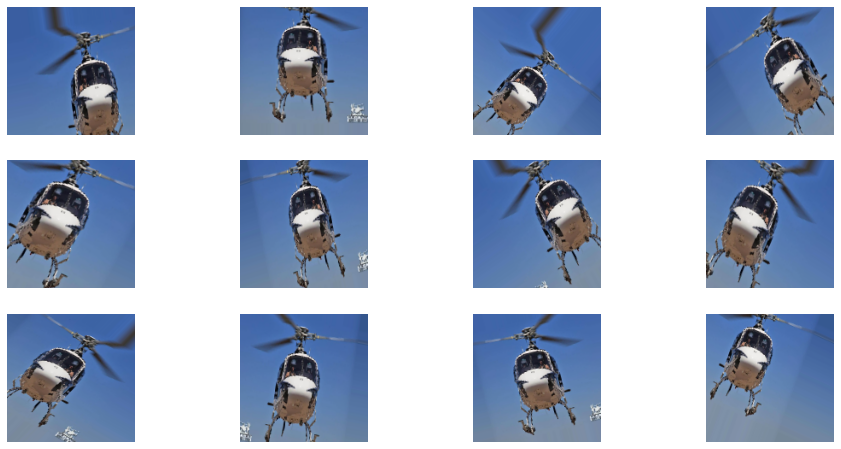

In [81]:
#show helicopter photo
show_random_augmented_image(train_helicopter_dir)

#BUILDING MODEL


In [82]:
batch_size = 32
step_per_epoch = train_size//batch_size
validation_steps = valid_size//batch_size

MODEL VGG19

In [83]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = True

def print_layers(model):
    for layer in model.layers:
        print(f"layer name: {layer.name:13} trainable: {layer.trainable}")

print_layers(conv_base)

layer name: input_1       trainable: True
layer name: block1_conv1  trainable: True
layer name: block1_conv2  trainable: True
layer name: block1_pool   trainable: True
layer name: block2_conv1  trainable: True
layer name: block2_conv2  trainable: True
layer name: block2_pool   trainable: True
layer name: block3_conv1  trainable: True
layer name: block3_conv2  trainable: True
layer name: block3_conv3  trainable: True
layer name: block3_conv4  trainable: True
layer name: block3_pool   trainable: True
layer name: block4_conv1  trainable: True
layer name: block4_conv2  trainable: True
layer name: block4_conv3  trainable: True
layer name: block4_conv4  trainable: True
layer name: block4_pool   trainable: True
layer name: block5_conv1  trainable: True
layer name: block5_conv2  trainable: True
layer name: block5_conv3  trainable: True
layer name: block5_conv4  trainable: True
layer name: block5_pool   trainable: True


Unblock last five layers

In [84]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print_layers(conv_base)    

layer name: input_1       trainable: False
layer name: block1_conv1  trainable: False
layer name: block1_conv2  trainable: False
layer name: block1_pool   trainable: False
layer name: block2_conv1  trainable: False
layer name: block2_conv2  trainable: False
layer name: block2_pool   trainable: False
layer name: block3_conv1  trainable: False
layer name: block3_conv2  trainable: False
layer name: block3_conv3  trainable: False
layer name: block3_conv4  trainable: False
layer name: block3_pool   trainable: False
layer name: block4_conv1  trainable: False
layer name: block4_conv2  trainable: False
layer name: block4_conv3  trainable: False
layer name: block4_conv4  trainable: False
layer name: block4_pool   trainable: False
layer name: block5_conv1  trainable: True
layer name: block5_conv2  trainable: True
layer name: block5_conv3  trainable: True
layer name: block5_conv4  trainable: True
layer name: block5_pool   trainable: True


CREATE MODEL

In [85]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 22,122,563
Trainable params: 11,537,411
Non-trainable params: 10,585,152
_________________________________________________________________


In [86]:
history = model.fit(train_generator, 
                    steps_per_epoch=step_per_epoch,
                    epochs=35,
                    validation_data=valid_generator,
                    validation_steps=validation_steps)

Epoch 1/35
27/27 [==============================] - 13s 445ms/step - loss: 1.0195 - accuracy: 0.4745 - val_loss: 0.9186 - val_accuracy: 0.5804
Epoch 2/35
27/27 [==============================] - 10s 378ms/step - loss: 0.8599 - accuracy: 0.6100 - val_loss: 0.7425 - val_accuracy: 0.7232
Epoch 3/35
27/27 [==============================] - 11s 396ms/step - loss: 0.7434 - accuracy: 0.7060 - val_loss: 0.7517 - val_accuracy: 0.6607
Epoch 4/35
27/27 [==============================] - 12s 449ms/step - loss: 0.7180 - accuracy: 0.6667 - val_loss: 0.6972 - val_accuracy: 0.7232
Epoch 5/35
27/27 [==============================] - 10s 390ms/step - loss: 0.6468 - accuracy: 0.7338 - val_loss: 0.7834 - val_accuracy: 0.6830
Epoch 6/35
27/27 [==============================] - 11s 389ms/step - loss: 0.6438 - accuracy: 0.7384 - val_loss: 0.7534 - val_accuracy: 0.6652
Epoch 7/35
27/27 [==============================] - 10s 364ms/step - loss: 0.5865 - accuracy: 0.7465 - val_loss: 0.6328 - val_accuracy: 0.7098

#SAVE HISTORY TO CSV


In [87]:
df_history = pd.DataFrame(history.history)
hist_csv = 'history.csv'
df_history.to_csv(hist_csv)

#READ HISTORY FROM CSV

In [15]:
hist_csv = 'history.csv'
history = pd.read_csv(hist_csv)


#SAVE MODEL

In [88]:
model.save('model_35epochs')

INFO:tensorflow:Assets written to: model_35epochs\assets


#LOAD MODEL

In [16]:
model_name = 'model_30epochs'
model = tensorflow.keras.models.load_model(model_name)

In [17]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 771       
Total params: 22,122,563
Trainable params: 11,537,411
Non-trainable params: 10,585,152
_________________________________________________________________


#PLOT HISTORY

In [89]:

def plot_hist(history):
    if type(history) != pd.DataFrame:
        hist = pd.DataFrame(history.history)
        hist['epoch'] = history.epoch
    else:
        hist = history
        hist['epoch'] = hist.index + 1
    
    fig = go.Figure()
    fig.add_trace(go.Scatter( x=hist['epoch'], y=hist['accuracy'], name='accuracy', mode='markers+lines'))
    fig.add_trace(go.Scatter( x=hist['epoch'], y=hist['val_accuracy'], name='val accuracy', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='accuracy vs. val accuracy', xaxis_title='Epochs', yaxis_title='Accuracy')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter( x=hist['epoch'], y=hist['loss'], name='loss', mode='markers+lines'))
    fig.add_trace(go.Scatter( x=hist['epoch'], y=hist['val_loss'], name='val loss', mode='markers+lines'))
    fig.update_layout(width=1000, height=500, title='loss vs. val loss', xaxis_title='Epochs', yaxis_title='Loss')
    fig.show()
plot_hist(history)

#MODEL EVALUATION

In [90]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  class_mode='categorical',
                                                  shuffle=False)

y_prob = model.predict(test_generator, test_generator.samples)

Found 384 images belonging to 3 classes.


In [91]:
y_pred = y_prob.argmax(axis= -1)
y_pred

array([0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,

In [92]:
predictions = pd.DataFrame({'class': y_pred})
predictions

,class
0,0
1,0
2,0
3,0
4,1
...,...
379,2
380,2
381,2
382,2


In [93]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [94]:
classes = list(test_generator.class_indices.keys())
classes

['drone', 'helicopter', 'passenger']

In [95]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[ 88,  15,  25],
       [  8, 112,   8],
       [ 22,   7,  99]], dtype=int64)

In [96]:
from plotly import figure_factory as ff
def plot_cm(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_cm(cm)

In [97]:
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

       drone       0.75      0.69      0.72       128
  helicopter       0.84      0.88      0.85       128
   passenger       0.75      0.77      0.76       128

    accuracy                           0.78       384
   macro avg       0.78      0.78      0.78       384
weighted avg       0.78      0.78      0.78       384



#PREDICTION ERROR

In [101]:
errors = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred}, index=test_generator.filenames)
errors['is_correct'] = (errors.y_true != errors.y_pred) * 1
errors

,y_true,y_pred,is_correct
drone\00001283.jpg,0,0,0
drone\00001284.jpg,0,0,0
drone\00001285.jpg,0,0,0
drone\00001286.jpg,0,0,0
drone\00001287.jpg,0,1,1
...,...,...,...
passenger\00001411.jpg,2,2,0
passenger\00001413.jpg,2,2,0
passenger\00001414.jpg,2,2,0
passenger\00001415.jpg,2,2,0


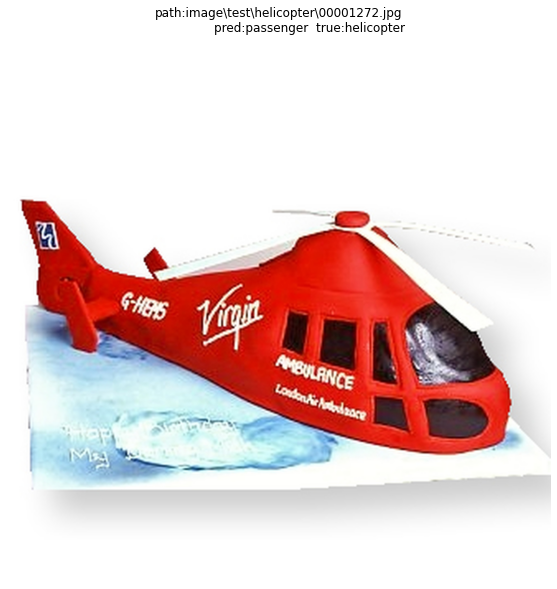

In [154]:
errors_idx =  errors[errors.is_correct == 1].index
errors_idx

def show_random_error_image():
    rand_idx = np.random.randint(len(errors_idx))
    img_path = os.path.join(test_dir, errors_idx[rand_idx] )

    img = image.load_img(img_path)

    class_list = list(test_generator.class_indices.keys())
    
    y_pred_class = class_list[errors[errors.index==errors_idx[rand_idx]].y_pred.values[0]]
    y_true_class = class_list[errors[errors.index==errors_idx[rand_idx]].y_true.values[0]]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.grid(False)
    plt.axis(False)
    plt.title(f"path:{img_path}\n\
                pred:{y_pred_class}  true:{y_true_class}")

show_random_error_image()
